## K-Means Clustering Approach to Energy Benchmark Overview

This notebook consists of the following section:
- Data Ingestion and Processing
- Description Analysis
- Feature Engineering and Outlier Removal
- K-Means Clustering
- Hypothesis Testing

---

### Data Ingestion and Processing

- Local Law 84 (2012 - 2016)
- Pluto (Manhattan, Brooklyn, Queens, Bronx, and Staten Island)
- Select the Necessary Columns
- Merge the LL84 and Pluto data
- Drop rows with any NA (naive approach)

In [10]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np
import matplotlib as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
import warnings
import matplotlib.style as style
warnings.filterwarnings('ignore')
style.use('fivethirtyeight')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [11]:
url_2016 = r"http://www.nyc.gov/html/gbee/downloads/excel/nyc_benchmarking_disclosure_data_reported_in_2016.xlsx"
url_2015 = r"http://www.nyc.gov/html/gbee/downloads/excel/2015_nyc_cy2014__ll84_disclosure_data.xlsx"
url_2014 = r"http://www.nyc.gov/html/gbee/downloads/excel/150428_2014_nyc_ll84_disclosure.xlsx"
url_2013 = r"http://www.nyc.gov/html/gbee/downloads/excel/2013_nyc_ll84_disclosure.xlsx"
url_2012 = r"http://www.nyc.gov/html/gbee/downloads/excel/2012_nyc_cy2011_ll84_disclosure_data.xls"

url_MN = "./data/BORO_zip_files_csv/MN.csv"
url_BK = "./data/BORO_zip_files_csv/BK.csv"
url_BX = "./data/BORO_zip_files_csv/BX.csv"
url_QN = "./data/BORO_zip_files_csv/QN.csv"
url_SI = "./data/BORO_zip_files_csv/SI.csv"

In [12]:
#Run only the first time downloading data

'''
xls_2016 = pd.read_excel(url_2016)
xls_2015 = pd.read_excel(url_2015)
xls_2014 = pd.read_excel(url_2014)
xls_2013 = pd.read_excel(url_2013)
xls_2012 = pd.read_excel(url_2012)

xls_2016.to_csv("./data/LL84_2016.csv", encoding='utf-8')
xls_2015.to_csv("./data/LL84_2015.csv", encoding='utf-8')
xls_2014.to_csv("./data/LL84_2014.csv", encoding='utf-8')
xls_2013.to_csv("./data/LL84_2013.csv", encoding='utf-8')
xls_2012.to_csv("./data/LL84_2012.csv", encoding='utf-8')

'''

'\nxls_2016 = pd.read_excel(url_2016)\nxls_2015 = pd.read_excel(url_2015)\nxls_2014 = pd.read_excel(url_2014)\nxls_2013 = pd.read_excel(url_2013)\nxls_2012 = pd.read_excel(url_2012)\n\nxls_2016.to_csv("./data/LL84_2016.csv", encoding=\'utf-8\')\nxls_2015.to_csv("./data/LL84_2015.csv", encoding=\'utf-8\')\nxls_2014.to_csv("./data/LL84_2014.csv", encoding=\'utf-8\')\nxls_2013.to_csv("./data/LL84_2013.csv", encoding=\'utf-8\')\nxls_2012.to_csv("./data/LL84_2012.csv", encoding=\'utf-8\')\n\n'

In [13]:
df_2016 = pd.read_csv(r'./data/LL84_2016.csv')
df_2015 = pd.read_csv(r'./data/LL84_2015.csv')
df_2014 = pd.read_csv(r'./data/LL84_2014.csv')
df_2013 = pd.read_csv(r'./data/LL84_2013.csv')
df_2012 = pd.read_csv(r'./data/LL84_2012.csv')

In [14]:
df_manhattan = pd.read_csv(url_MN)
df_brooklyn = pd.read_csv(url_BK)
df_bronx = pd.read_csv(url_BX)
df_queens = pd.read_csv(url_QN)
df_staten = pd.read_csv(url_SI)

In [15]:
# Row Concatenate to a Single Dataset
df_pluto = pd.concat([df_manhattan, df_brooklyn, df_bronx, df_queens, df_staten])

In [16]:
df_pluto.shape

(858370, 84)

In [17]:
# Remove Dummy Columns

del df_2016['Unnamed: 0']
del df_2015['Unnamed: 0']
del df_2014['Unnamed: 0']
del df_2013['Unnamed: 0']
del df_2012['Unnamed: 0']

In [18]:
# Keep BBL, Energy, and Floor Data

keepCol = ['BBL', 'Site EUI\n(kBtu/ft2)', 'Property Floor Area (Buildngs and Parking)\n(ft2)']
ads_2013 = df_2013[keepCol]
ads_2013.columns = ['BBL', 'EUI_2013', 'floorArea_2013']

keepCol = ['NYC Borough, Block, and Lot (BBL)', 'Site EUI\n(kBtu/ft2)', 
           'DOF Property Floor Area (Buildngs and Parking)\n(ft2)']
ads_2014 = df_2014[keepCol]
ads_2014.columns = ['BBL', 'EUI_2014', 'floorArea_2014']

keepCol = ['NYC Borough, Block, and Lot (BBL)', 'Site EUI\n(kBtu/ft2)',
          'DOF Property Floor Area (Buildngs and Parking)\n(ft2)']
ads_2015 = df_2015[keepCol]
ads_2015.columns = ['BBL', 'EUI_2015', 'floorArea_2015']

keepCol = ['NYC Borough, Block and Lot (BBL)', 'Site EUI (kBtu/ft²)', 'DOF Property Floor Area (ft²)',
          'Primary Property Type - Self Selected']
ads_2016 = df_2016[keepCol]
ads_2016.columns = ['BBL', 'EUI_2016', 'floorArea_2016','TYPE_2016']

In [19]:
ads = ads_2013.merge(ads_2014, left_on='BBL', right_on='BBL', how='left')\
              .merge(ads_2015, left_on='BBL', right_on='BBL', how='left')\
              .merge(ads_2016, left_on='BBL', right_on='BBL', how='left')

In [20]:
ads.shape

(17914, 10)

In [21]:
ads.sample(10)

,BBL,EUI_2013,floorArea_2013,EUI_2014,floorArea_2014,EUI_2015,floorArea_2015,EUI_2016,floorArea_2016,TYPE_2016
10720,3035890038,61.4,76222.0,68.7,75233.0,NaN,75233.0,64.6,75233.0,Multifamily Housing
3973,1012930037,59.5,119872.0,67.9,111310.0,72.9,111310.0,67.6,111310.0,Multifamily Housing
11303,3053200024,NaN,NaN,NaN,120689.0,77.4,120689.0,NaN,NaN,NaN
17739,5022500370,141.2,211000.0,NaN,185000.0,Not Available,185000.0,150.2,185000.0,Senior Care Community
16856,4084900002,NaN,96976.0,7804.7,123120.0,6254.5,123120.0,14316.3,123120.0,Multifamily Housing
4476,1014270034,50.9,97677.0,NaN,90700.0,80.7,90700.0,81.7,90700.0,Multifamily Housing
11357,3053760076,254.2,102550.0,NaN,102550.0,85.7,102550.0,78.0,102550.0,Multifamily Housing
16895,4093420007,NaN,NaN,158.9,487000.0,164.5,487000.0,4.2,487000.0,Parking
15079,4070210001,239.4,6106.0,133,4687440.0,162.2,4687440.0,NaN,NaN,NaN
3259,1007850029,30.4,170054.0,20.2,163681.0,58.4,163681.0,62.0,163681.0,Multifamily Housing


In [22]:
# Fix Type of EUI_2014 and EUI_2015 to Float
ads['EUI_2014'] = pd.to_numeric(ads['EUI_2014'], errors='coerce')
ads['EUI_2015'] = pd.to_numeric(ads['EUI_2015'], errors='coerce')
ads['BBL'] = pd.to_numeric(ads['BBL'], errors = 'coerce')
ads.shape

(17914, 10)

In [23]:
df_pluto['BBL'] = pd.to_numeric(df_pluto['BBL'], errors = 'coerce')

In [24]:
df_pluto.sample(10)

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,PolicePrct,HealthArea,SanitBoro,SanitDistrict,SanitSub,Address,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,Overlay1,Overlay2,SPDist1,SPDist2,SPDist3,LtdHeight,SplitZone,BldgClass,LandUse,Easements,OwnerType,OwnerName,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AreaSource,NumBldgs,NumFloors,UnitsRes,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,Ext,ProxCode,IrrLotCode,LotType,BsmtCode,AssessLand,AssessTot,ExemptLand,ExemptTot,YearBuilt,YearAlter1,YearAlter2,HistDist,Landmark,BuiltFAR,ResidFAR,CommFAR,FacilFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,Version
96470,SI,5636,91,503,170.12,2017.0,31.0,51.0,10312.0,E167,123.0,800.0,5.0,3.0,4C,134 FIGUREA AVENUE,R3A,NaN,NaN,NaN,NaN,NaN,SRD,NaN,NaN,NaN,N,A2,1.0,0,NaN,"LU, JODY XIAO LAN",4100,1496,0,1088,0,0,0,0,0,0,2,1,1.0,1,1,41.00,100.00,26.00,44.00,G,1.0,N,5.0,1.0,11580.0,28500.0,1550.0,1550.0,1977,0,0,NaN,NaN,0.36,0.60,0.0,1.0,5,5.056360e+09,0,17012,936295.0,139864.0,33c,NaN,504 452,52402.0,NaN,0.000000e+00,NaN,1,16V2
28724,BX,3474,20,209,4.00,1004.0,8.0,18.0,10473.0,E096,43.0,3030.0,2.0,9.0,4C,327 WHITE PLAINS ROAD,R3-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,B2,1.0,0,NaN,PICO LUIS A,4210,2160,0,2160,0,0,0,0,0,0,2,2,2.0,2,2,32.75,137.46,24.00,45.00,NaN,2.0,Y,5.0,1.0,9393.0,26640.0,1550.0,1550.0,2001,0,0,NaN,NaN,0.51,0.60,0.0,1.0,2,2.034740e+09,0,4,1023972.0,235387.0,7a,NaN,217 058,21402.0,NaN,2.034740e+09,09/18/2002,1,16V2
81359,BK,3118,17,301,485.00,2009.0,14.0,34.0,11206.0,E237,90.0,900.0,3.0,1.0,5B,23 BOGART STREET,M1-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,F9,6.0,0,P,LEVY REALTY LLC,2421,2421,2421,0,0,0,0,0,2421,0,2,1,1.0,0,1,25.00,96.83,25.00,96.83,NaN,0.0,Y,5.0,2.0,43650.0,104850.0,0.0,0.0,1931,0,0,NaN,NaN,1.00,0.00,2.0,4.8,3,3.031180e+09,0,485,1002762.0,195785.0,13b,NaN,309 032,31005.0,NaN,0.000000e+00,NaN,1,16V2
72009,QN,2984,10,405,661.00,1002.0,24.0,30.0,11379.0,E319,104.0,1822.0,4.0,5.0,1C,63-12 75 PLACE,R4B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,B1,1.0,0,NaN,VADALA MARK J,2700,3162,0,3162,0,0,0,0,0,0,2,1,2.0,2,2,27.00,100.00,23.33,50.00,NaN,2.0,N,5.0,1.0,20372.0,49101.0,1550.0,1550.0,1965,0,0,NaN,NaN,1.17,0.90,0.0,2.0,4,4.029840e+09,0,661,1017239.0,201085.0,13c,NaN,420 017,41602.0,NaN,0.000000e+00,NaN,1,16V2
125956,BK,4793,58,309,806.00,2001.0,17.0,40.0,11225.0,E249,71.0,4800.0,3.0,9.0,2B,509 MAPLE STREET,R6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,A9,1.0,0,NaN,"ZELMAN, DAVID",2000,459,0,459,0,0,0,0,0,0,2,1,1.0,1,1,20.00,100.00,17.00,27.00,NaN,1.0,N,5.0,2.0,8008.0,11701.0,0.0,0.0,1915,0,0,NaN,NaN,0.23,2.43,0.0,4.8,3,3.047930e+09,0,806,999821.0,180271.0,17b,NaN,310 018,31506.0,NaN,0.000000e+00,NaN,1,16V2
2674,BX,2402,15,201,69.00,2005.0,7.0,17.0,10455.0,L055,40.0,3900.0,2.0,1.0,1B,378 EAST 156 STREET,R6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,M1,8.0,0,P,GREATER VICTORY BAPTI,5000,6960,6960,0,0,0,0,0,0,6960,2,1,2.0,0,1,50.00,100.00,40.00,87.00,NaN,0.0,N,5.0,5.0,21150.0,118800.0,21150.0,118800.0,1901,0,0,NaN,NaN,1.39,2.43,0.0,4.8,2,2.024020e+09,0,69,1007379.0,238336.0,6a,NaN,209N080,20905.0,NaN,0.000000e+00,NaN,1,16V2
42968,SI,1979,38,502,273.02,1010.0,31.0,50.0,10314.0,E163,121.0,100.0,5.0,2.0,3C,57 DRYSDALE STREET,R3-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,A5,1.0,0,NaN,DANIEL DEUTSCH,3000,1332,0,1332,0,0,0,0,0,0,2,1,2.0,1,1,23.83,100.00,18.00,37.00,NaN,2.0,Y,3.0,2.0,9000.0,23100.0,1550.0,1550.0,1970,0,0,NaN,NaN,0.44,0.60,0.0,1.0,5,5.019790e+09,0,27302,945946.0,157774.0,26c,NaN,503 385,50901.0,NaN,0.000000e+00,NaN,1,16V2
104286,BK,4003,4,305,1166.00,2002.0,19.0,37.0,11208.0,E332,75.0,6200.0,3.0,5.0,1E,445 LINWOOD STREET,R5B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,C5,2.0,0,P,"FERRIGNO, LUIGI G",2500,2520,0,2520,0,0,0,0,0,0,2,1,2.0,10,10,25.00,100.00,20.00,42.00,NaN,2.0,N,5.0,1.0,7694.0,9587.0,0.0,0.0,1901,0,0,NaN,NaN,1.01,1.35,0.0,2.0,3,3.040030e+09,0,1166,1016848.0,185041.0,17c,NaN,308 016,

In [25]:
ads2 = ads.merge(df_pluto[['BBL', 'Borough','LotArea', 'BldgArea', 'ComArea', 'ResArea', 
                              'OfficeArea', 'RetailArea', 'NumFloors', 'UnitsRes', 'UnitsTotal', 'YearBuilt',
                             'XCoord', 'YCoord', 'ZipCode', 'Address']], 
                left_on = 'BBL', 
                right_on = 'BBL',
                how = "left")

In [26]:
ads2.shape

(17914, 25)

In [27]:
ads2.sample(10)

,BBL,EUI_2013,floorArea_2013,EUI_2014,floorArea_2014,EUI_2015,floorArea_2015,EUI_2016,floorArea_2016,TYPE_2016,Borough,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,NumFloors,UnitsRes,UnitsTotal,YearBuilt,XCoord,YCoord,ZipCode,Address
1257,1007120001,NaN,NaN,141.3,281361.0,136.5,281361.0,122.6,281361.0,Office,MN,34188.0,281361.0,281361.0,0.0,154952.0,17865.0,8.0,0.0,30.0,1936.0,982238.0,209695.0,10014.0,444 WEST 15 STREET
6048,1002157502,74.6,64467.0,80.6,58015.0,89.6,58015.0,82.6,58015.0,Multifamily Housing,MN,7634.0,58015.0,4307.0,53708.0,0.0,4307.0,9.0,24.0,26.0,1930.0,981865.0,202256.0,10013.0,161 HUDSON STREET
11388,4097140018,83.1,106609.0,91.5,97094.0,95.7,97094.0,89.6,97094.0,Multifamily Housing,QN,41440.0,97094.0,0.0,97094.0,0.0,0.0,6.0,118.0,118.0,1959.0,1034924.0,198699.0,11435.0,141-05 PERSHING CRESCENT
1762,1008170001,79.0,91360.0,85.4,101231.0,83.9,101231.0,79.0,101231.0,Multifamily Housing,MN,17475.0,101231.0,18287.0,82944.0,5171.0,3360.0,6.0,108.0,111.0,1973.0,985407.0,208205.0,10011.0,552 AVENUE OF THE AMER
9461,3001570001,NaN,NaN,NaN,290356.0,NaN,290356.0,11.1,290356.0,Parking,BK,58400.0,290356.0,290356.0,0.0,16000.0,25756.0,5.0,0.0,1.0,1957.0,988420.0,190585.0,11201.0,11 HOYT STREET
14028,2032560144,85.3,100916.0,109.8,86500.0,112.3,86500.0,110.9,86500.0,Multifamily Housing,BX,18560.0,86500.0,0.0,86500.0,0.0,0.0,6.0,79.0,79.0,1928.0,1011194.0,258239.0,10463.0,2905 KINGSBRIDGE TERRACE
16201,4071170006,47.4,14670.0,309.4,410788.0,305.5,410788.0,275.6,410788.0,Multifamily Housing,QN,790500.0,410788.0,24360.0,386428.0,0.0,0.0,2.0,410.0,411.0,1950.0,1045694.0,208925.0,11365.0,194-05 67 AVENUE
17348,4157800020,55.1,250648.0,56.5,473690.0,NaN,473690.0,56.0,473690.0,Multifamily Housing,QN,352825.0,473690.0,8200.0,465490.0,2400.0,0.0,6.0,569.0,572.0,1952.0,1051929.0,156693.0,11691.0,20-20 SEAGIRT BOULEVARD
6862,2024430170,107.1,14000.0,201.2,876500.0,NaN,876500.0,63.5,876500.0,Multifamily Housing,BX,163680.0,876500.0,14000.0,862500.0,14000.0,0.0,25.0,936.0,937.0,1964.0,1006304.0,239355.0,10451.0,773 CONCOURSE VILLAGE E
8516,2037140030,34.5,71570.0,34.9,65064.0,49.2,65064.0,NaN,65064.0,NaN,BX,15000.0,65064.0,8500.0,56564.0,0.0,8500.0,6.0,75.0,78.0,1927.0,1017951.0,240149.0,10472.0,1070 ELDER AVENUE


In [28]:
ads2 = ads2.dropna()
ads2.shape

(9852, 25)

In [29]:
ads2.sample(10)

,BBL,EUI_2013,floorArea_2013,EUI_2014,floorArea_2014,EUI_2015,floorArea_2015,EUI_2016,floorArea_2016,TYPE_2016,Borough,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,NumFloors,UnitsRes,UnitsTotal,YearBuilt,XCoord,YCoord,ZipCode,Address
2733,1010300039,99.8,117071.0,118.4,122071.0,107.8,122071.0,98.0,122071.0,Multifamily Housing,MN,10050.0,122071.0,9250.0,112821.0,3000.0,0.0,23.0,88.0,90.0,1968.0,989786.0,218703.0,10019.0,210 CENTRAL PARK SOUTH
3962,4047810001,63.6,92250.0,94.9,51745.0,107.0,51745.0,115.5,51745.0,Multifamily Housing,QN,30000.0,51745.0,0.0,51745.0,0.0,0.0,6.0,48.0,48.0,1954.0,1032924.0,221362.0,11354.0,26-15 PARSONS BOULEVARD
13676,2028400022,105.2,69507.0,84.7,69507.0,95.4,69507.0,94.4,69507.0,Multifamily Housing,BX,19853.0,69507.0,0.0,69507.0,0.0,0.0,8.0,63.0,63.0,2002.0,1007029.0,244627.0,10452.0,1325 WALTON AVENUE
4885,4033210069,68.1,64716.0,80.5,64716.0,80.2,64716.0,72.3,64716.0,Multifamily Housing,QN,17300.0,64716.0,0.0,64716.0,0.0,0.0,6.0,59.0,59.0,1931.0,1029795.0,196607.0,11418.0,83-15 116 STREET
13221,4013367501,107.7,53040.0,113.5,52000.0,106.4,52000.0,115.6,52000.0,Multifamily Housing,QN,1.0,52088.0,12033.0,40055.0,0.0,12033.0,4.0,68.0,70.0,1942.0,1011179.0,210515.0,11377.0,61-20 WOODSIDE AVENUE
5551,1018690029,77.4,66650.0,167.9,64650.0,179.8,64650.0,171.8,64650.0,Multifamily Housing,MN,13274.0,64650.0,8000.0,56650.0,0.0,8000.0,7.0,44.0,47.0,1901.0,992506.0,228943.0,10025.0,760 AMSTERDAM AVENUE
5550,1021590035,125.8,55380.0,149.4,55380.0,136.7,55380.0,127.5,55380.0,Multifamily Housing,MN,15000.0,55380.0,0.0,55380.0,0.0,0.0,5.0,66.0,66.0,1924.0,1003979.0,250141.0,10040.0,461 AUDUBON AVENUE
9410,3000537501,73.7,359370.0,78.4,379258.0,80.3,379258.0,76.6,379258.0,Multifamily Housing,BK,31389.0,358551.0,78127.0,280424.0,0.0,10165.0,31.0,266.0,271.0,2006.0,987839.0,195035.0,11201.0,100 JAY STREET
9813,3009230037,91.7,71669.0,79.9,71288.0,79.0,71288.0,75.2,71288.0,Multifamily Housing,BK,16200.0,71288.0,0.0,71288.0,0.0,0.0,6.0,66.0,66.0,1959.0,985149.0,174172.0,11232.0,4114 9 AVENUE
5576,1018730052,71.0,61205.0,94.7,61400.0,106.8,61400.0,92.1,61400.0,Multifamily Housing,MN,13146.0,61400.0,6000.0,55400.0,0.0,6000.0,6.0,27.0,34.0,1920.0,992676.0,230180.0,10025.0,2669 BROADWAY


---
### Descriptive Analysis

In [30]:
ads2.describe()

,EUI_2013,floorArea_2013,EUI_2014,floorArea_2014,EUI_2015,floorArea_2015,EUI_2016,floorArea_2016,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,NumFloors,UnitsRes,UnitsTotal,YearBuilt,XCoord,YCoord,ZipCode
count,9852.000000,9.852000e+03,9852.000000,9.852000e+03,9852.000000,9.852000e+03,9852.000000,9.852000e+03,9.852000e+03,9.852000e+03,9.852000e+03,9.852000e+03,9.852000e+03,9.852000e+03,9852.000000,9852.000000,9852.000000,9852.000000,9.852000e+03,9852.000000,9852.000000
mean,343.953004,1.471067e+05,300.838733,2.257816e+05,297.488205,2.256627e+05,285.229710,2.247900e+05,1.267069e+05,2.139132e+05,6.904258e+04,1.397229e+05,2.955497e+04,7.383250e+03,10.057907,149.817905,156.066991,1947.717012,1.006466e+06,212367.702294,10650.544762
std,6125.572932,2.810634e+05,3454.308910,4.177119e+05,4959.973292,4.175439e+05,3308.438957,4.161726e+05,2.508793e+05,3.357882e+05,2.719371e+05,2.186430e+05,1.484242e+05,3.664011e+04,8.913930,274.153578,274.515768,37.808440,2.263430e+04,25855.998989,594.651059
min,0.000000,0.000000e+00,0.000000,5.002900e+04,0.000000,5.002900e+04,0.000000,5.002900e+04,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,9.275100e+05,136924.000000,10001.000000
25%,61.175000,5.774375e+04,70.000000,7.240575e+04,72.600000,7.236675e+04,69.300000,7.244950e+04,1.340750e+04,7.114075e+04,0.000000e+00,5.198400e+04,0.000000e+00,0.000000e+00,6.000000,45.000000,50.000000,1928.000000,9.902395e+05,202108.000000,10025.000000
50%,79.500000,8.442250e+04,88.500000,1.239910e+05,91.300000,1.240705e+05,87.750000,1.241410e+05,2.254050e+04,1.205970e+05,2.229500e+03,8.227500e+04,0.000000e+00,0.000000e+00,6.000000,80.000000,84.000000,1949.000000,9.986360e+05,211840.000000,10463.000000
75%,101.700000,1.494462e+05,115.100000,2.132452e+05,112.600000,2.124050e+05,111.800000,2.124242e+05,8.455000e+04,2.071695e+05,3.210650e+04,1.695295e+05,0.000000e+00,2.992500e+03,13.000000,180.000000,180.000000,1962.000000,1.022286e+06,225452.000000,11354.000000
max,494449.300000,6.385382e+06,119619.800000,1.343508e+07,288491.500000,1.343508e+07,133017.400000,1.343508e+07,1.952770e+06,1.343508e+07,1.343508e+07,5.529331e+06,3.583167e+06,1.176864e+06,85.000000,8270.000000,8271.000000,2013.000000,1.065288e+06,272155.000000,11694.000000


In [31]:
function = ads2.groupby('TYPE_2016').size()
function

TYPE_2016
Ambulatory Surgical Center                       2
Automobile Dealership                            2
College/University                             188
Data Center                                      5
Distribution Center                             37
Enclosed Mall                                    2
Financial Office                                 8
Hospital (General Medical & Surgical)           68
Hotel                                          116
K-12 School                                     28
Laboratory                                      11
Manufacturing/Industrial Plant                   8
Medical Office                                  16
Mixed Use Property                              99
Movie Theater                                    4
Multifamily Housing                           7888
Museum                                           2
Non-Refrigerated Warehouse                      83
Office                                         830
Other                

In [32]:
function.to_csv('./data/function.csv')

In [33]:
borough = ads2.groupby('Borough').size()
borough

Borough
BK    1526
BX    1457
MN    3900
QN    2707
SI     262
dtype: int64

In [34]:
borough.to_csv('./data/borought.csv')

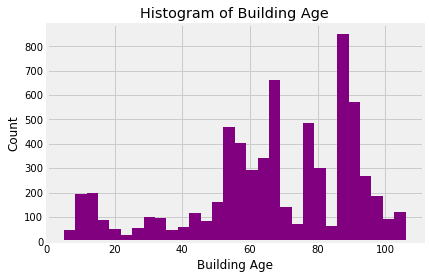

In [85]:
ads2['Age'] = 2017 - ads2['YearBuilt']

ads2['Age'].hist(bins = 30, color = "purple")
plt.xlabel("Building Age");
plt.ylabel("Count");
plt.title("Histogram of Building Age")

---

### Feature Engineering and Remove Outliers

- rolling average
- 2 & 3 year average (2013-2014, 2013-2015)
- trend (up or down between 2013 and 2015)
- standard deviation of EUI each year by building; filter out 
- building age
- residential, office, and commercial area as % of total
- remove outliers (over 95 percentile)

In [36]:
ads2['avgEUI_1315'] = ads2[['EUI_2013', 'EUI_2014', 'EUI_2015']].mean(axis = 1)
ads2['avgEUI_1314'] = ads2[['EUI_2013', 'EUI_2014']].mean(axis = 1)

ads2['changeEUI_1315'] = (ads2['EUI_2015'] - ads2['EUI_2013']) / ads2['EUI_2013']
ads2['stdEUI'] = ads2[['EUI_2013', 'EUI_2014', 'EUI_2015']].std(axis = 1)
ads2['age'] = 2017 - ads2['YearBuilt']

ads2['resAreaPerc'] = ads2['ResArea'] / ads2['BldgArea']
ads2['comAreaPerc'] = ads2['ComArea'] / ads2['BldgArea']
ads2['officeAreaPerc'] = ads2['OfficeArea'] / ads2['BldgArea']

In [37]:
# remove buidlings with high standard deviation of EUI across years; it could be error in reporting
ads2 = ads2[ads2.stdEUI < ads2.stdEUI.quantile(.95)]
ads2 = ads2[ads2.age < ads2.age.quantile(.95)]
ads2 = ads2[ads2.changeEUI_1315 < ads2.changeEUI_1315.quantile(.95)]
ads2 = ads2[ads2.comAreaPerc < ads2.comAreaPerc.quantile(.95)]
ads2 = ads2[ads2.officeAreaPerc < ads2.officeAreaPerc.quantile(.95)]

In [38]:
ads2.shape

(6626, 34)

---

## Clustering using K-Means

- seperate into groups by Building Type
- seperate into sub-group using K Means

In [39]:
# seperate properties by building type

In [70]:
multiFam = ads2[(ads2.TYPE_2016 == 'Multifamily Housing')] 
hotels = ads2[(ads2.TYPE_2016 == 'Hotel')] 
res = ads2[(ads2.TYPE_2016 == 'Residence Hall/Dormitory')] 

In [71]:
kmean_feature = ['age', 'ZipCode', 'BldgArea', 'resAreaPerc', 'comAreaPerc', 'officeAreaPerc']
init = 100
seed = 123

kmeans = KMeans(n_clusters=3, random_state = seed, n_init = init)

kmeans.fit(multiFam[kmean_feature])
multiFam['km_group'] = kmeans.predict(multiFam[kmean_feature])

In [48]:
'''min_max_scaler = preprocessing.MinMaxScaler()
multiFam_normalized = min_max_scaler.fit_transform(multiFam[kmean_feature])
multiFam_normalized = pd.DataFrame(multiFam_normalized)
multiFam_normalized.columns = kmean_feature
multiFam_normalized.sample(10)'''

,age,ZipCode,BldgArea,resAreaPerc,comAreaPerc,officeAreaPerc
1428,0.544554,0.037803,0.020097,1.000000,0.000000,0.0
3616,0.712871,0.730656,0.008904,1.000000,0.000000,0.0
2420,0.841584,0.266391,0.019130,0.974359,0.026353,0.0
5558,0.603960,0.806852,0.026316,0.897918,0.104915,0.0
3202,0.811881,0.272298,0.029510,1.000000,0.000000,0.0
1820,0.514851,0.014176,0.056419,1.000000,0.000000,0.0
2594,0.821782,0.811577,0.007293,1.000000,0.000000,0.0
529,0.227723,0.650325,0.053722,0.985747,0.014649,0.0
211,0.574257,0.272888,0.016146,0.941840,0.059774,0.0
2004,0.722772,0.811577,0.011550,1.000000,0.000000,0.0


In [67]:
'''init = 100
seed = 123

kmeans = KMeans(n_clusters=3, random_state = seed, n_init = init)

kmeans.fit(multiFam_normalized)
multiFam['km_group'] = kmeans.predict(multiFam_normalized'''

"init = 100\nseed = 123\n\nkmeans = KMeans(n_clusters=3, random_state = seed, n_init = init)\n\nkmeans.fit(multiFam_normalized)\nmultiFam['km_group'] = kmeans.predict(multiFam_normalized"

In [72]:
# How many instance in a group?
multiFam.groupby('km_group').size()

km_group
0    5649
1     145
2     650
dtype: int64

In [73]:
# Calculate k-mean based EUI stats from Iteration 1
multiFam_stats = pd.pivot_table(multiFam, index= 'km_group', values= "EUI_2016",
                               aggfunc= [np.mean, np.median, min, max, np.std, np.size])

# Rename Columns by Joining with "_"
multiFam_stats.columns = ["Group_"+"_".join((i,j)) for i,j in multiFam_stats.columns]
multiFam_stats = multiFam_stats.reset_index()

multiFam_stats

,km_group,Group_mean_EUI_2016,Group_median_EUI_2016,Group_min_EUI_2016,Group_max_EUI_2016,Group_std_EUI_2016,Group_size_EUI_2016
0,0,146.433581,85.1,0.4,105263.6,1969.555007,5649.0
1,1,2968.099310,223.0,18.7,24115.4,7733.887953,145.0
2,2,274.031692,92.7,0.0,49924.0,2323.516693,650.0


In [74]:
multiFam = multiFam.merge(multiFam_stats, left_on = 'km_group', right_on = 'km_group', how = 'left')

In [75]:
multiFam.sample(10)

,BBL,EUI_2013,floorArea_2013,EUI_2014,floorArea_2014,EUI_2015,floorArea_2015,EUI_2016,floorArea_2016,TYPE_2016,Borough,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,NumFloors,UnitsRes,UnitsTotal,YearBuilt,XCoord,YCoord,ZipCode,Address,Age,avgEUI_1315,avgEUI_1314,changeEUI_1315,stdEUI,age,resAreaPerc,comAreaPerc,officeAreaPerc,km_group,Group_mean_EUI_2016,Group_median_EUI_2016,Group_min_EUI_2016,Group_max_EUI_2016,Group_std_EUI_2016,Group_size_EUI_2016
2445,3053280015,46.5,87500.0,49.8,75000.0,55.9,75000.0,57.7,75000.0,Multifamily Housing,BK,18700.0,75000.0,0.0,75000.0,0.0,0.0,6.0,60.0,60.0,1931.0,991048.0,175092.0,11218.0,120 OCEAN PARKWAY,86.0,50.733333,48.15,0.202151,4.768997,86.0,1.000000,0.000000,0.000000,0,146.433581,85.1,0.4,105263.6,1969.555007,5649.0
4250,3061220038,85.2,75706.0,102.5,75624.0,114.7,75624.0,107.9,75624.0,Multifamily Housing,BK,18510.0,75624.0,0.0,75624.0,0.0,0.0,6.0,91.0,91.0,1962.0,975354.0,163403.0,11209.0,9602 4 AVENUE,55.0,100.800000,93.85,0.346244,14.823292,55.0,1.000000,0.000000,0.000000,0,146.433581,85.1,0.4,105263.6,1969.555007,5649.0
1904,1005447501,101.5,121158.0,104.2,121158.0,99.8,121158.0,88.5,121158.0,Multifamily Housing,MN,13818.0,102792.0,15980.0,86812.0,0.0,8563.0,12.0,26.0,28.0,1920.0,986666.0,204899.0,10003.0,56 COOPER SQUARE,97.0,101.833333,102.85,-0.016749,2.218859,97.0,0.844540,0.155460,0.000000,0,146.433581,85.1,0.4,105263.6,1969.555007,5649.0
3345,2047200001,80.5,9738.0,134.5,148800.0,145.2,148800.0,163.7,148800.0,Multifamily Housing,BX,130000.0,148800.0,0.0,148800.0,0.0,0.0,4.0,158.0,158.0,1935.0,1025936.0,259023.0,10469.0,1400 HICKS STREET,82.0,120.066667,107.50,0.803727,34.680878,82.0,1.000000,0.000000,0.000000,0,146.433581,85.1,0.4,105263.6,1969.555007,5649.0
4749,4003420018,16.7,70800.0,16.4,70000.0,20.8,70000.0,18.6,70000.0,Multifamily Housing,QN,14665.0,70000.0,5000.0,65000.0,0.0,5000.0,6.0,71.0,77.0,1929.0,1003278.0,215065.0,11106.0,29-02 29 STREET,88.0,17.966667,16.55,0.245509,2.458319,88.0,0.928571,0.071429,0.000000,0,146.433581,85.1,0.4,105263.6,1969.555007,5649.0
4931,4014627501,91.3,97934.0,86.2,93297.0,86.2,93297.0,76.6,93297.0,Multifamily Housing,QN,20000.0,83943.0,20101.0,63842.0,0.0,20101.0,6.0,88.0,99.0,1927.0,1017965.0,212771.0,11372.0,88-01 37 AVENUE,90.0,87.900000,88.75,-0.055860,2.944486,90.0,0.760540,0.239460,0.000000,0,146.433581,85.1,0.4,105263.6,1969.555007,5649.0
6233,2043410020,25.2,79995.0,127.2,79995.0,71.3,79995.0,91.5,79995.0,Multifamily Housing,BX,27880.0,79995.0,0.0,79995.0,0.0,0.0,6.0,95.0,95.0,1993.0,1020535.0,252587.0,10467.0,2275 OLINVILLE AVENUE,24.0,74.566667,76.20,1.829365,51.078404,24.0,1.000000,0.000000,0.000000,0,146.433581,85.1,0.4,105263.6,1969.555007,5649.0
343,1006030037,35.0,91170.0,43.9,81040.0,62.3,81040.0,37.1,81040.0,Multifamily Housing,MN,10130.0,81040.0,7500.0,73540.0,0.0,7500.0,8.0,39.0,40.0,1920.0,981987.0,205815.0,10014.0,644 GREENWICH STREET,97.0,47.066667,39.45,0.780000,13.922763,97.0,0.907453,0.092547,0.000000,0,146.433581,85.1,0.4,105263.6,1969.555007,5649.0
4911,4014510032,94.7,97420.0,93.4,89340.0,26.5,89340.0,93.3,89340.0,Multifamily Housing,QN,21000.0,89340.0,2100.0,87240.0,2100.0,0.0,6.0,111.0,114.0,1956.0,1018376.0,213588.0,11372.0,90-11 35 AVENUE,61.0,71.533333,94.05,-0.720169,39.005427,61.0,0.976494,0.023506,0.023506,0,146.433581,85.1,0.4,105263.6,1969.555007,5649.0
1924,1018940031,50.7,167786.0,52.7,157300.0,56.0,157300.0,53.4,157300.0,Multifamily Housing,MN,12850.0,157300.0,0.0,157300.0,0.0,0.0,15.0,108.0,108.0,1924.0,993296.0,232755.0,10025.0,390 RIVERSIDE DRIVE,93.0,53.133333,51.70,0.104536,2.676440,93.0,1.000000,0.000000,0.000000,0,146.433581,85.1,0.4,105263.6,1969.555007,5649.0


In [84]:
multiFam.to_csv("./data/multiFam.csv")

---

## Hypothesis Testing

Determining if the groups created by K-Means is statistically different is a critical validation of the K-Means Approach. EUI of each K-Means sub-group should be statistically different. To do so, a bi-variant Z-Test is performed.

**Hypothesis**:

- Group 1 has a higher EUI 2016 average than group 0 @ 95% confidence (Z-Score > 2)
- Group 1 has a higher EUI 2016 average than group 2 @ 95% confidence (Z-Score > 2)
- Group 2 has a higher EUI 2016 average than group 0 @ 95% confidence (Z-Score > 2)

**Null Hypothesis**:

- Group 1 has an equal or smaller EUI 2016 average than group 0 @ 95% confidence (Z-Score <= 2)
- Group 1 has an equal or smaller EUI 2016 average than group 2 @ 95% confidence (Z-Score <= 2)
- Group 2 has an equal or smaller EUI 2016 average than group 0 @ 95% confidence (Z-Score <= 2)

**Z Test Formula**

$Z = \frac{(u_a - u_b) \sqrt N_a}{std_a}$

where 

- $u_a$ is the mean of EUI 2016 of group a
- $u_b$ is the mean of EUI 2016 of group b
- $N_a$ is the total number of observation of group a
- $std_a$ is the standard deviation of group a

In [76]:
multiFam_stats

,km_group,Group_mean_EUI_2016,Group_median_EUI_2016,Group_min_EUI_2016,Group_max_EUI_2016,Group_std_EUI_2016,Group_size_EUI_2016
0,0,146.433581,85.1,0.4,105263.6,1969.555007,5649.0
1,1,2968.099310,223.0,18.7,24115.4,7733.887953,145.0
2,2,274.031692,92.7,0.0,49924.0,2323.516693,650.0


In [83]:
multiFam_stats.to_csv('./data/multifam_stat.csv')

In [77]:
mean_0 = multiFam_stats[(multiFam_stats.km_group ==0)]['Group_mean_EUI_2016'].values[0]
mean_1 = multiFam_stats[(multiFam_stats.km_group ==1)]['Group_mean_EUI_2016'].values[0]
mean_2 = multiFam_stats[(multiFam_stats.km_group ==2)]['Group_mean_EUI_2016'].values[0]

std_0 = multiFam_stats[(multiFam_stats.km_group ==0)]['Group_std_EUI_2016'].values[0]
std_1 = multiFam_stats[(multiFam_stats.km_group ==1)]['Group_std_EUI_2016'].values[0]
std_2 = multiFam_stats[(multiFam_stats.km_group ==2)]['Group_std_EUI_2016'].values[0]

N_0 = multiFam_stats[(multiFam_stats.km_group ==0)]['Group_size_EUI_2016'].values[0]
N_1 = multiFam_stats[(multiFam_stats.km_group ==1)]['Group_size_EUI_2016'].values[0]
N_2 = multiFam_stats[(multiFam_stats.km_group ==2)]['Group_size_EUI_2016'].values[0]

In [81]:
# Group 1 vs. Group 0

Z_0_1 = (mean_1 - mean_0) * np.sqrt(N_1) / std_1
Z_0_1

4.393308379399131

In [79]:
# Group 2 vs. Group 0

Z_0_2 = (mean_2 - mean_0) * np.sqrt(N_2) / std_2
Z_0_2

1.4000873344923261

In [82]:
# Group 1 vs. Group 2

Z_1_2 = (mean_1 - mean_2) * np.sqrt(N_1) / std_1
Z_1_2

4.1946392581483876

### Hypothesis Testing Results

**Null Hypothesis**:

- Group 1 has an equal or smaller EUI 2016 average than group 0 @ 95% confidence (Z-Score <= 2): Reject
- Group 1 has an equal or smaller EUI 2016 average than group 2 @ 95% confidence (Z-Score <= 2): Cannot Reject
- Group 2 has an equal or smaller EUI 2016 average than group 0 @ 95% confidence (Z-Score <= 2): Reject

### Reference

http://www.learndatasci.com/k-means-clustering-algorithms-python-intro/